In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("sales_updated.csv")

In [5]:
df['Region'] = df['Region'].str.title()

In [19]:
df.loc[df['Region'].isna() & df['Product'].str.contains("Blazers", case=False), 'Region'] = 'East'

In [20]:
for product in df['Product']:
    mean_value = df.loc[df['Product'] == product, 'Amount'].mean()
    df.loc[(df['Product'] == product) & (df['Amount'].isna()), 'Amount'] = mean_value


In [25]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month_name()

In [29]:
monthly_sales = df.groupby('Month')['Amount'].sum()
top_month = monthly_sales.sort_values(ascending=False).index[0]
print(f"Month with highest sales: {top_month}")


Month with highest sales: March


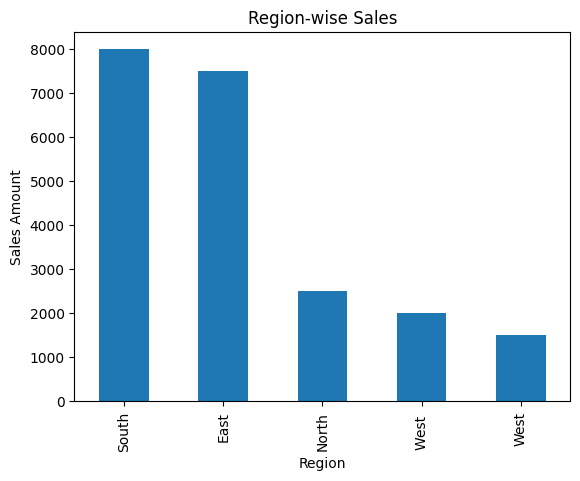

In [30]:
region_sales = df.groupby('Region')['Amount'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Region-wise Sales', ylabel='Sales Amount')
plt.show()

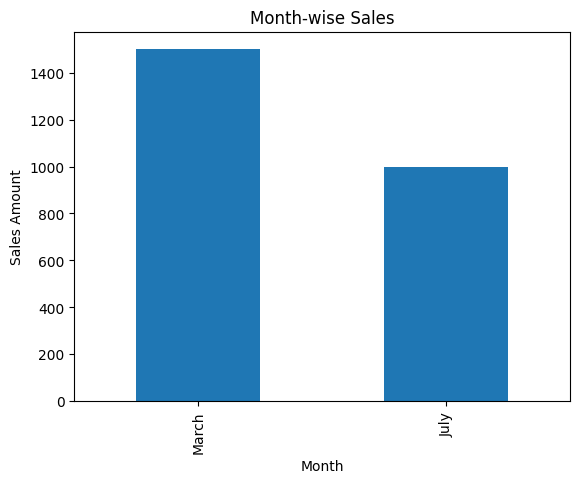

In [31]:
monthly_sales = monthly_sales.sort_values(ascending=False)
monthly_sales.plot(kind='bar', title='Month-wise Sales', ylabel='Sales Amount')
plt.show()